In [33]:
# Import libraries 

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # This is adjusting the configuration of the plot we will be creating. 

df = pd.read_csv('/Users/OmidAghazadeh/Desktop/python_work/movies.csv')

In [34]:
# Taking a look at the data. 

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [35]:
# First I am going to see if any of the data is missing using a for loop. 

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [36]:
# Data Types for the columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [37]:
df.describe()

year        score         votes        budget         gross  \
count  7668.000000  7665.000000  7.665000e+03  5.497000e+03  7.479000e+03   
mean   2000.405451     6.390411  8.810850e+04  3.558988e+07  7.850054e+07   
std      11.153508     0.968842  1.633238e+05  4.145730e+07  1.657251e+08   
min    1980.000000     1.900000  7.000000e+00  3.000000e+03  3.090000e+02   
25%    1991.000000     5.800000  9.100000e+03  1.000000e+07  4.532056e+06   
50%    2000.000000     6.500000  3.300000e+04  2.050000e+07  2.020576e+07   
75%    2010.000000     7.100000  9.300000e+04  4.500000e+07  7.601669e+07   
max    2020.000000     9.300000  2.400000e+06  3.560000e+08  2.847246e+09   

           runtime  
count  7664.000000  
mean    107.261613  
std      18.581247  
min      55.000000  
25%      95.000000  
50%     104.000000  
75%     116.000000  
max     366.000000

In [38]:
# When taking a closer look at our dataframe I noticed there are 2 collumns with a released date.  I will drop the one that says released date and keep the one that says year. 

df = df.drop(columns="released")

In [39]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

   score      votes         director                   writer            star  \
0    8.4   927000.0  Stanley Kubrick             Stephen King  Jack Nicholson   
1    5.8    65000.0   Randal Kleiser  Henry De Vere Stacpoole  Brooke Shields   
2    8.7  1200000.0   Irvin Kershner           Leigh Brackett     Mark Hamill   
3    7.7   221000.0     Jim Abrahams             Jim Abrahams     Robert Hays   
4    7.3   108000.0     Harold Ramis       Brian Doyle-Murray     Chevy Chase   

          country      budget        gross             company  runtime  
0  United Kingdom  19000000.0   46998772.0        Warner Bros.    146.0  
1   United States   4500000.0   58853106.0   Columbia Pictures    104.0  
2   United States  18000000.0  538375067.0           Lucasfilm    124.0  
3   United States   3500000.0   83453539.0  Paramount Pictures     88.0  
4   United States   6000000.0   39846344.0      Orion Pictures     98.0

In [40]:
# I want to sort the values by gross profits.  

df.sort_values(by=['gross'], inplace=False, ascending=False)

name rating   genre  year  score  \
5445                                      Avatar  PG-13  Action  2009    7.8   
7445                           Avengers: Endgame  PG-13  Action  2019    8.4   
3045                                     Titanic  PG-13   Drama  1997    7.8   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015    7.8   
7244                      Avengers: Infinity War  PG-13  Action  2018    8.4   
...                                          ...    ...     ...   ...    ...   
7663                                More to Life    NaN   Drama  2020    3.1   
7664                                 Dream Round    NaN  Comedy  2020    4.7   
7665                               Saving Mbango    NaN   Drama  2020    5.7   
7666                                It's Just Us    NaN   Drama  2020    NaN   
7667                                   Tee em el    NaN  Horror  2020    5.7   

          votes       director              writer               star  \
5445  1100000.0  James Cameron       James Cameron    Sam Worthington   
7445   903000.0  Anthony Russo  Christopher Markus  Robert Downey Jr.   
3045  1100000.0  James Cameron       James Cameron  Leonardo DiCaprio   
6663   876000.0    J.J. Abrams     Lawrence Kasdan       Daisy Ridley   
7244   897000.0  Anthony Russo  Christopher Markus  Robert Downey Jr.   
...         ...            ...                 ...                ...   
7663       18.0  Joseph Ebanks       Joseph Ebanks       Shannon Bond   
7664       36.0   Dusty Dukatz         Lisa Huston   Michael Saquella   
7665       29.0   Nkanya Nkwai        Lynno Lovert       Onyama Laura   
7666        NaN  James Randall       James Randall      Christina Roz   
7667        7.0   Pereko Mosia        Pereko Mosia   Siyabonga Mabaso   

            country       budget         gross                    company  \
5445  United States  237000000.0  2.847246e+09      Twentieth Century Fox   
7445  United States  356000000.0  2.797501e+09             Marvel Studios   
3045  United States  200000000.0  2.201647e+09      Twentieth Century Fox   
6663  United States  245000000.0  2.069522e+09                  Lucasfilm   
7244  United States  321000000.0  2.048360e+09             Marvel Studios   
...             ...          ...           ...                        ...   
7663  United States       7000.0           NaN                        NaN   
7664  United States          NaN           NaN  Cactus Blue Entertainment   
7665  United States      58750.0           NaN           Embi Productions   
7666  United States      15000.0           NaN                        NaN   
7667   South Africa          NaN           NaN                PK 65 Films   

      runtime  
5445    162.0  
7445    181.0  
3045    194.0  
6663    138.0  
7244    149.0  
...       ...  
7663     90.0  
7664     90.0  
7665      NaN  
7666    120.0  
7667    102.0  

[7668 rows x 14 columns]

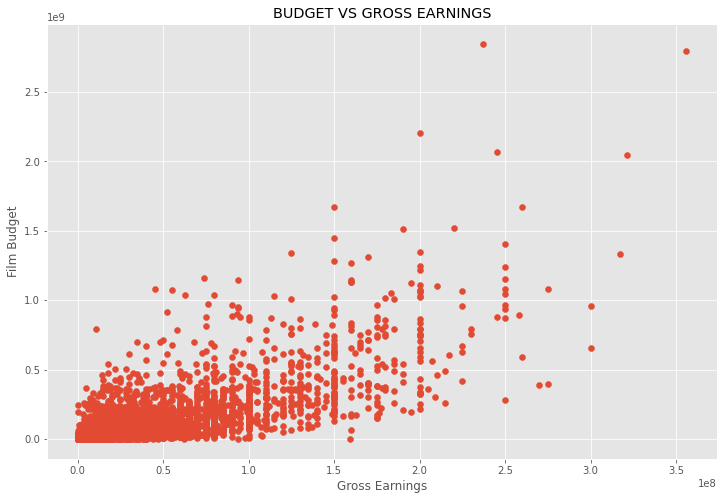

In [70]:
# My prediction is that a higher budget for a film will correlate with a higher gross revenue. 
#Lets start doing some visualizations!
# First I will create a scatter plot for budget vs gross:

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('BUDGET VS GROSS EARNINGS')

plt.xlabel('Gross Earnings')
plt.ylabel('Film Budget')

plt.show()



<AxesSubplot:xlabel='budget', ylabel='gross'>

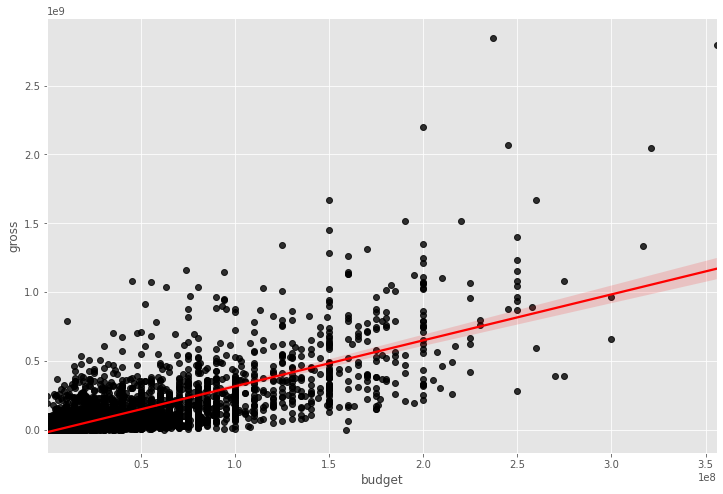

In [72]:
# Plot budget vs gross using seaborn for a better visual.

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "black"}, line_kws={"color": "red"})

In [73]:
# I will look at correlation.

df.corr()

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.329321  0.257486  0.120811
score    0.097995  1.000000  0.409182  0.076254  0.186258  0.399451
votes    0.222945  0.409182  1.000000  0.442429  0.630757  0.309212
budget   0.329321  0.076254  0.442429  1.000000  0.740395  0.320447
gross    0.257486  0.186258  0.630757  0.740395  1.000000  0.245216
runtime  0.120811  0.399451  0.309212  0.320447  0.245216  1.000000

In [74]:
# Based on this I can see a higher Correlation between Bugets and Gross.  

# Lets visualize using a heatmap to get a better idea if there are any other correlations.


<function matplotlib.pyplot.show(close=None, block=None)>

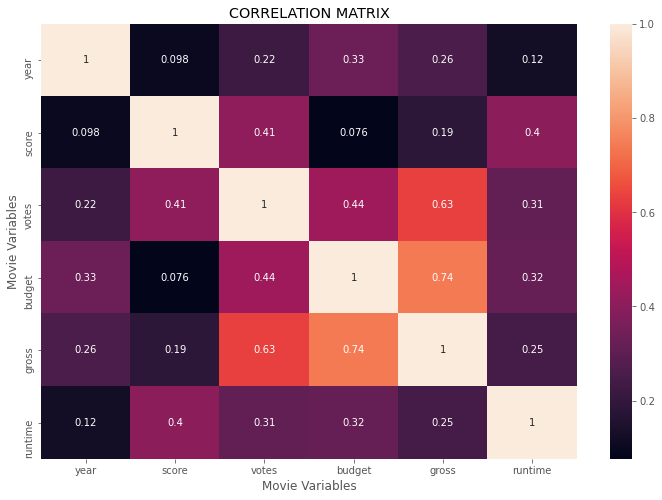

In [77]:
correlations_matrix = df.corr()

sns.heatmap(correlations_matrix, annot=True)

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('CORRELATION MATRIX')

plt.xlabel('Movie Variables')
plt.ylabel('Movie Variables')

plt.show

In [76]:
# We can see that in addition to budget and gross, gross and 'votes' also has a high correlation. 

<AxesSubplot:xlabel='budget', ylabel='votes'>

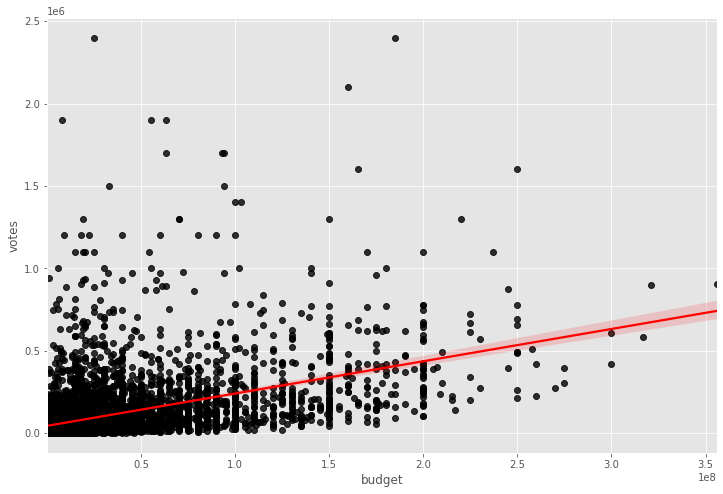

In [78]:
# I will make another scatter plt to see any correlation between budget and votes.

sns.regplot(x='budget', y='votes', data=df, scatter_kws={"color": "black"}, line_kws={"color": "red"})



In [79]:
# It also has a positive correlation. 

# lets see if something else, Studio Company, also has some kind of correlation to gross revenue. 

In [87]:
# Going to make some categories that are objects into numerical categories.

df_numerical = df

for col_name in df_numerical.columns:
    if(df_numerical[col_name].dtype == 'object'):
        df_numerical[col_name] = df_numerical[col_name].astype('category')
        df_numerical[col_name] = df_numerical[col_name].cat.codes
        
df_numerical        

name     rating  genre  \
0                                           The Shining          R      6   
1                                       The Blue Lagoon          R      1   
2        Star Wars: Episode V - The Empire Strikes Back         PG      0   
3                                             Airplane!         PG      4   
4                                            Caddyshack          R      4   
5                                       Friday the 13th          R     10   
6                                    The Blues Brothers          R      0   
7                                           Raging Bull          R      3   
8                                           Superman II         PG      0   
9                                       The Long Riders          R      3   
10                                Any Which Way You Can         PG      0   
11                               The Gods Must Be Crazy         PG      1   
12                                               Popeye         PG      1   
13                                      Ordinary People          R      6   
14                                      Dressed to Kill          R      5   
15                                    Somewhere in Time         PG      6   
16                                                 Fame          R      6   
17                                               9 to 5         PG      4   
18                                              The Fog          R     10   
19                                           Stir Crazy          R      4   
20                                             Cruising          R      5   
21                                        Heaven's Gate          R      1   
22                                  The Final Countdown         PG      0   
23                                               Xanadu         PG      8   
24                                         Urban Cowboy         PG      6   
25                                       Altered States          R     10   
26                                      Little Darlings          R      4   
27                                    Raise the Titanic         PG      0   
28                                             Brubaker          R      5   
29                                      American Gigolo          R      5   
30                                         My Bodyguard         PG      4   
31                                           Prom Night          R     10   
32                             Smokey and the Bandit II         PG      0   
33                     Cattle Annie and Little Britches         PG      6   
34                                 Seems Like Old Times         PG      4   
35                                     Private Benjamin          R      4   
36                                The Hollywood Knights          R      4   
37                                           Motel Hell          R      4   
38                                      The Jazz Singer         PG      6   
39                                Coal Miner's Daughter         PG      3   
40                             The Watcher in the Woods         PG      7   
41                                       Breaker Morant         PG      6   
42                                        The Stunt Man          R      0   
43                               Where the Buffalo Roam          R      3   
44                                        The Awakening          R     10   
45                        Cheech and Chong's Next Movie          R      4   
46                                           The Island          R      0   
47                                       The Boogey Man          R     10   
48                                        The Nude Bomb         PG      0   
49                                   Lion of the Desert         PG      3   
50                                    Stardust Memories         PG      4   
51                                    Melvin an

<function matplotlib.pyplot.show(close=None, block=None)>

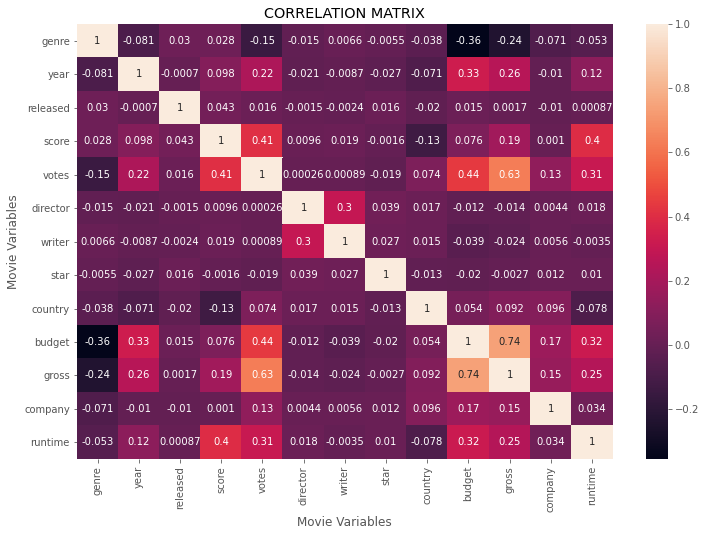

In [85]:
correlations_matrix = df_numerical.corr()

sns.heatmap(correlations_matrix, annot=True)

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('CORRELATION MATRIX')

plt.xlabel('Movie Variables')
plt.ylabel('Movie Variables')

plt.show

In [86]:
# Now we can see what other categories are highly correlated.  
# We can see Budget, votes, and score is correlated.  

In [88]:
correlation_mat = df_numerical.corr()
corr_pairs = correlation_mat.unstack()

corr_pairs

genre     genre       1.000000
          year       -0.081261
          released    0.029822
          score       0.027965
          votes      -0.145307
          director   -0.015258
          writer      0.006566
          star       -0.005477
          country    -0.037615
          budget     -0.356564
          gross      -0.235650
          company    -0.071067
          runtime    -0.052711
year      genre      -0.081261
          year        1.000000
          released   -0.000695
          score       0.097995
          votes       0.222945
          director   -0.020795
          writer     -0.008655
          star       -0.027242
          country    -0.070938
          budget      0.329321
          gross       0.257486
          company    -0.010431
          runtime     0.120811
released  genre       0.029822
          year       -0.000695
          released    1.000000
          score       0.042788
          votes       0.016097
          director   -0.001478
        

In [90]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget    genre      -0.356564
genre     budget     -0.356564
gross     genre      -0.235650
genre     gross      -0.235650
          votes      -0.145307
votes     genre      -0.145307
country   score      -0.133348
score     country    -0.133348
genre     year       -0.081261
year      genre      -0.081261
country   runtime    -0.078412
runtime   country    -0.078412
company   genre      -0.071067
genre     company    -0.071067
country   year       -0.070938
year      country    -0.070938
genre     runtime    -0.052711
runtime   genre      -0.052711
budget    writer     -0.039451
writer    budget     -0.039451
genre     country    -0.037615
country   genre      -0.037615
year      star       -0.027242
star      year       -0.027242
writer    gross      -0.023519
gross     writer     -0.023519
director  year       -0.020795
year      director   -0.020795
released  country    -0.020427
country   released   -0.020427
budget    star       -0.019589
star      budget     -0.019589
        

In [93]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross     votes       0.630757
votes     gross       0.630757
gross     budget      0.740395
budget    gross       0.740395
genre     genre       1.000000
writer    writer      1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [94]:
# Conclusion: Budget and votes have the highest correlation to gross earnings. 